In [2]:
import numpy as np
import pandas as pd

# Use Library ##


In [3]:
data = {
  "department": ["sales","sales","sales","systems","systems","systems","systems","markating","markating","secretly","secretly"],
  "status": ["senior","junior","junior","junior","senior","junior","senior","senior","junior","senior","junior"],
  "age":[33,28,33,23,33,28,43,38,33,48,28],
  "salary":[48000,28000,33000,48000,68000,48000,68000,48000,43000,38000,28000]
}
# initial by avrage of age and salary
df=pd.DataFrame(data)
df

,department,status,age,salary
0,sales,senior,33,48000
1,sales,junior,28,28000
2,sales,junior,33,33000
3,systems,junior,23,48000
4,systems,senior,33,68000
5,systems,junior,28,48000
6,systems,senior,43,68000
7,markating,senior,38,48000
8,markating,junior,33,43000
9,secretly,senior,48,38000


Add Data with Pandas

In [4]:
df['status'].replace({"senior":1,"junior":0},inplace=True)
df['department'].replace({"sales":0,"systems":1,"markating":2,"secretly":3},inplace=True)
df

,department,status,age,salary
0,0,1,33,48000
1,0,0,28,28000
2,0,0,33,33000
3,1,0,23,48000
4,1,1,33,68000
5,1,0,28,48000
6,1,1,43,68000
7,2,1,38,48000
8,2,0,33,43000
9,3,1,48,38000


change data to numeric

split data for predict


In [5]:
y=df.status
x=df.drop('status',axis='columns')

split data to train and test

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

train data with decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')

In [8]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

check accurancy of data

In [9]:
model.score(X_test,y_test)

0.6666666666666666

predict with decision tree

In [10]:
model.predict([[1,43,48000]])

C:\Users\parsian\PycharmProjects\first\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

plot decision tree

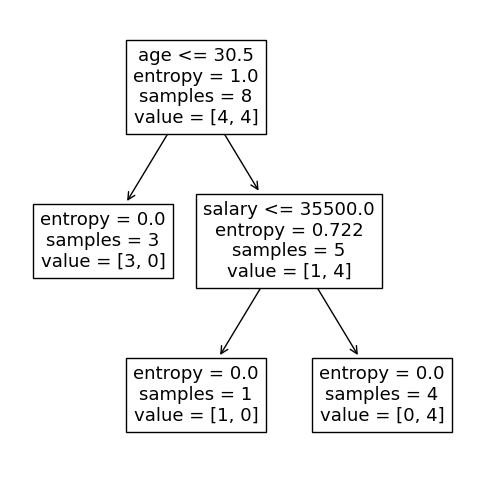

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, ax = plt.subplots(figsize=(6, 6))
tree.plot_tree(model,ax=ax,feature_names=['department','age','salary','status'])
plt.show()

plot of feature importance(this fearture use in tree base  and ensemble model like random forest ,xgboost and decision tree)

<Figure size 1000x1000 with 0 Axes>

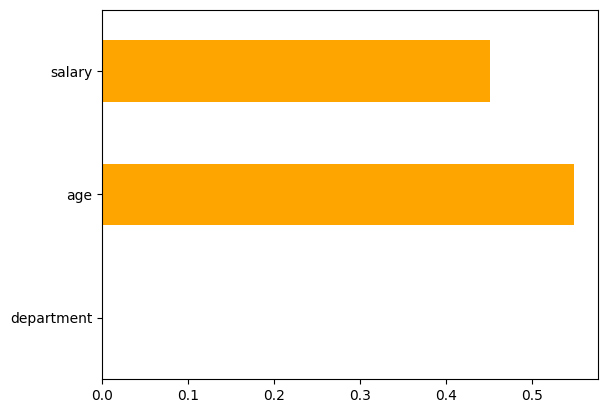

<Figure size 1000x1000 with 0 Axes>

In [19]:
feature_importances=pd.Series(model.feature_importances_,index=X_train.columns)
feature_importances.plot(kind='barh',color='orange')
plt.figure(figsize=[10,10])

train with Naive bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()

In [13]:
naive.fit(X_train,y_train)

GaussianNB()

check accurancy of naive


In [14]:
naive.score(X_test,y_test)

1.0

predict with naive

In [16]:
naive.predict([[1,43,48000]])

C:\Users\parsian\PycharmProjects\first\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)